In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
real_estate = pd.read_csv("real_estate_price_size_year_view.csv")
real_estate = real_estate.reset_index(drop=True)
real_estate = real_estate.drop(['year', 'view'], axis=1)
print(real_estate.columns)

Index(['price', 'size'], dtype='object')


In [3]:
x = real_estate['price']
y = real_estate['size']
x = np.array(x)
y = np.array(y)
x.sort()
y.sort()

In [4]:
def mean(dataset):
    return dataset.sum()/len(dataset)

def variance(dataset,mean_value):
    squared_diff = np.square(dataset-mean_value)
    return mean(squared_diff)

def standard_deviation(variance):
    return np.sqrt(variance)

def covariance(dataset1,dataset2):
    mean1 = mean(dataset1)
    mean2 = mean(dataset2)
    return np.sum(np.multiply(dataset1-mean1,dataset2-mean2))/len(dataset1)

def correlation(dataset1,dataset2):
    mean1 = mean(dataset1)
    mean2 = mean(dataset2)
    num = np.sum(np.multiply(dataset1-mean1,dataset2-mean2))
    den = np.multiply(np.sum(np.square(dataset1-mean1)),np.sum(np.square(dataset2-mean2)))
    return num/np.sqrt(den)

def standard_error(dataset,sd):
    return sd/np.sqrt(len(dataset))

In [5]:
mean1 = mean(x)
mean2 = mean(y)
var = variance(x,mean1)
sd = standard_deviation(var)
cv = covariance(x,y)
cr = correlation(x,y)
se = standard_error(x,sd)

print(mean1,mean2,var,sd,cv,cr,se)

292289.47015999997 853.0242 5877599027.400532 76665.50089447359 22023652.253658123 0.9690364416342563 7666.550089447359


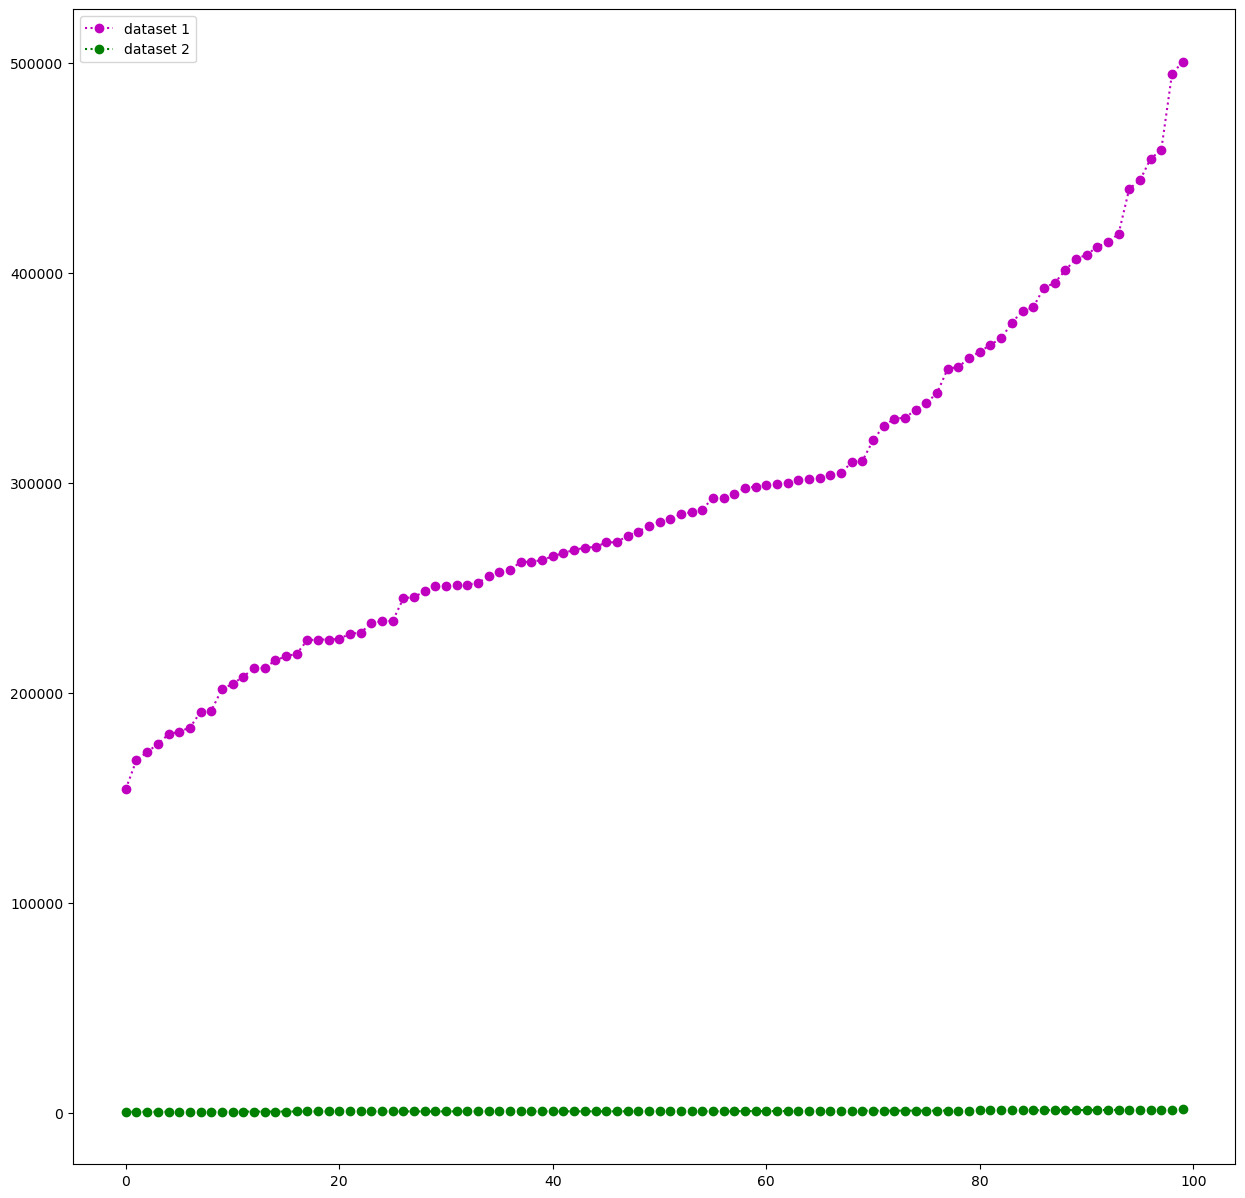

In [6]:
plt.figure(figsize=(15, 15))
plt.plot(x,"mo:",label="dataset 1")
plt.plot(y,"go:",label = "dataset 2")
plt.legend(loc="upper left")

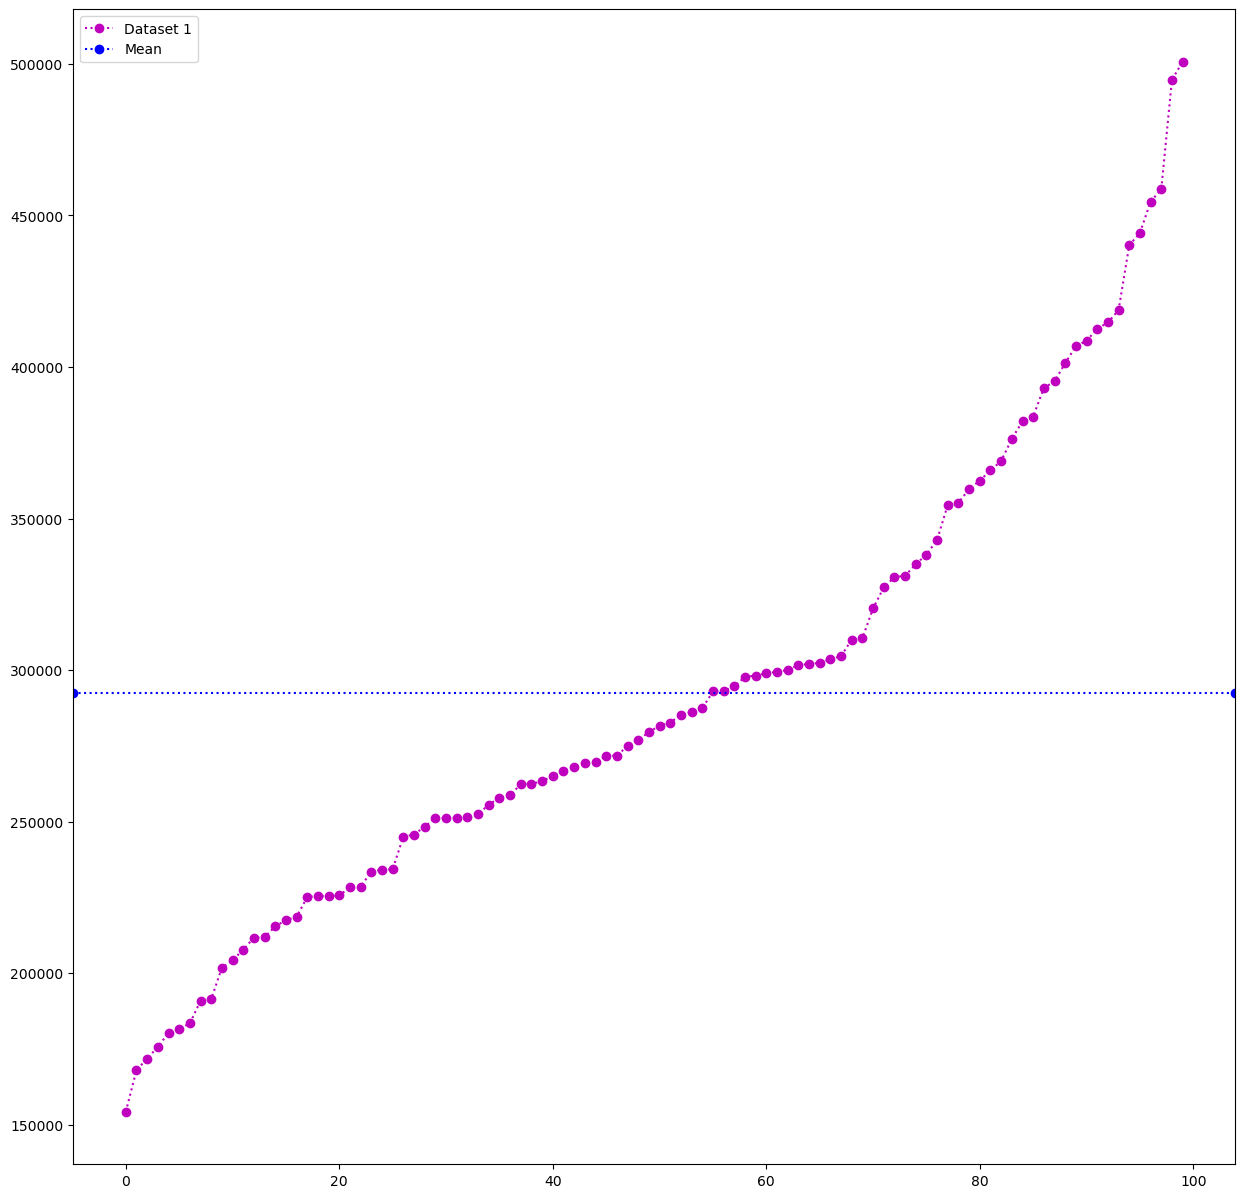

In [7]:
plt.figure(figsize=(15, 15))
plt.plot(x,"mo:",label="Dataset 1")
plt.axhline(mean1,color='b',marker= 'o', linestyle=':',label="Mean")
plt.legend(loc="upper left")

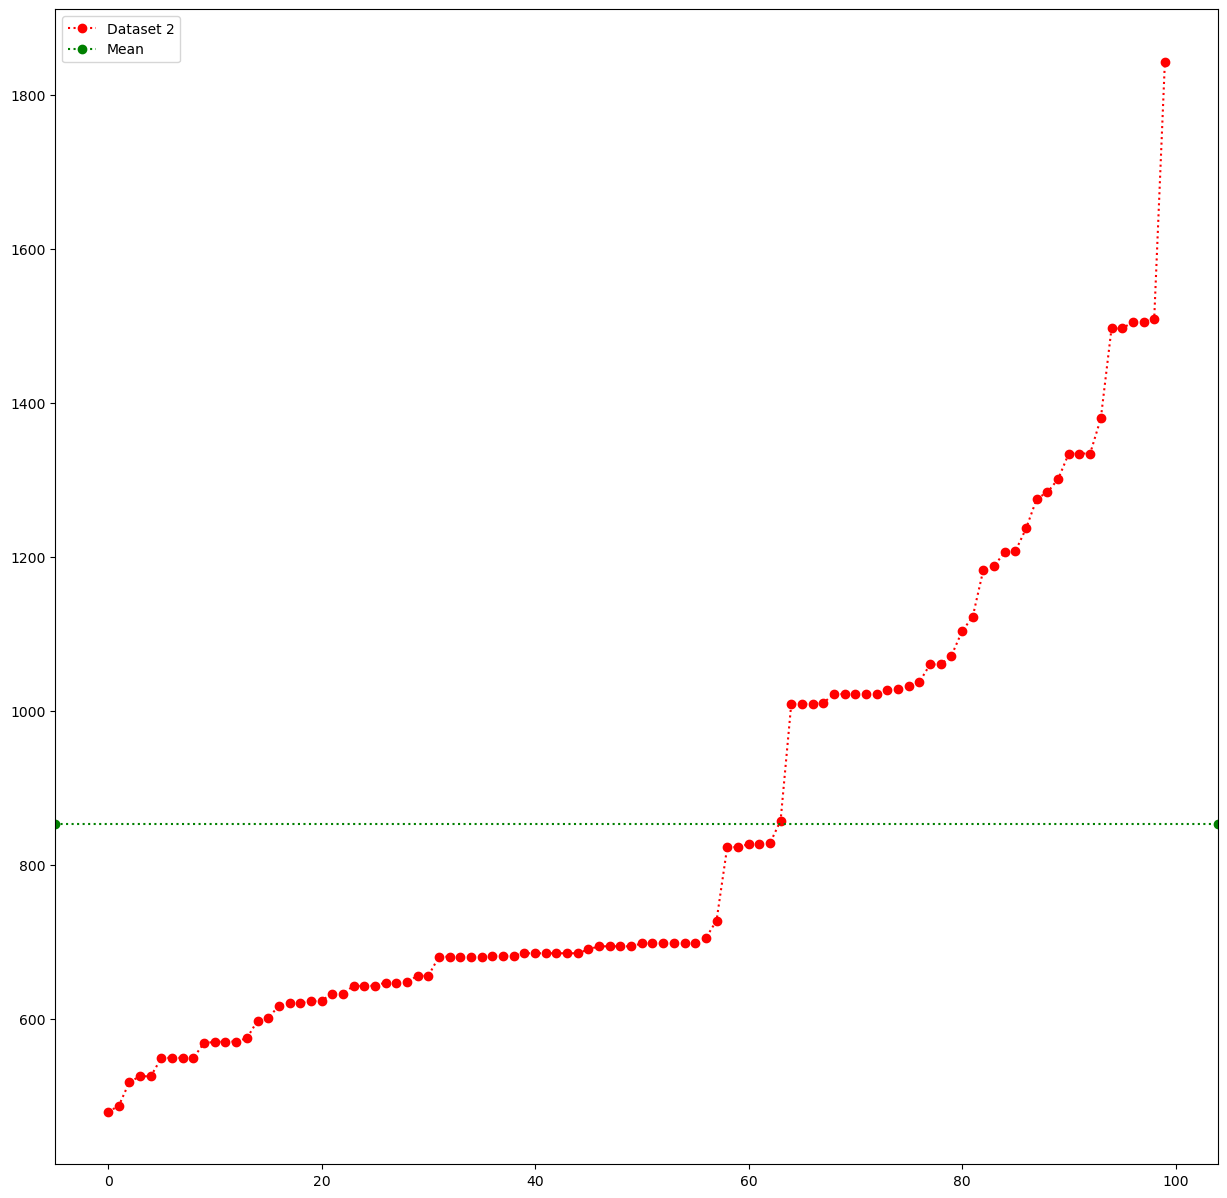

In [8]:
plt.figure(figsize=(15, 15))
plt.plot(y,"ro:",label="Dataset 2")
plt.axhline(mean2,color='g',marker= 'o', linestyle=':',label="Mean")
plt.legend(loc="upper left")

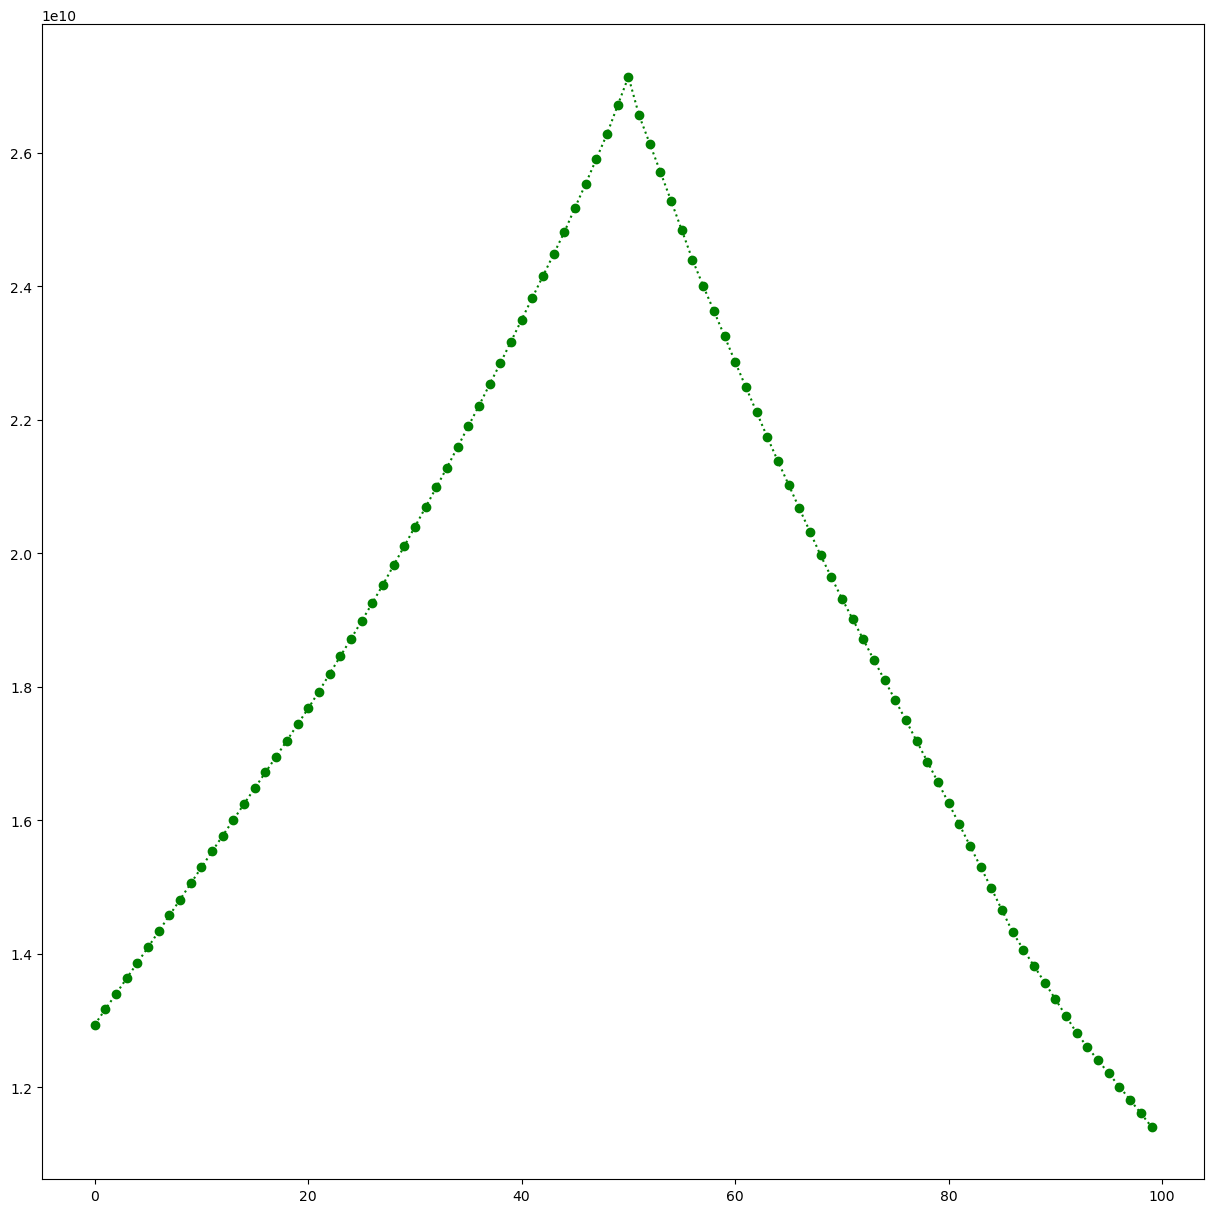

In [9]:
corr = np.correlate(x, y, "same")
plt.figure(figsize=(15, 15))
plt.plot(list(corr),"go:",label = "Correlation")

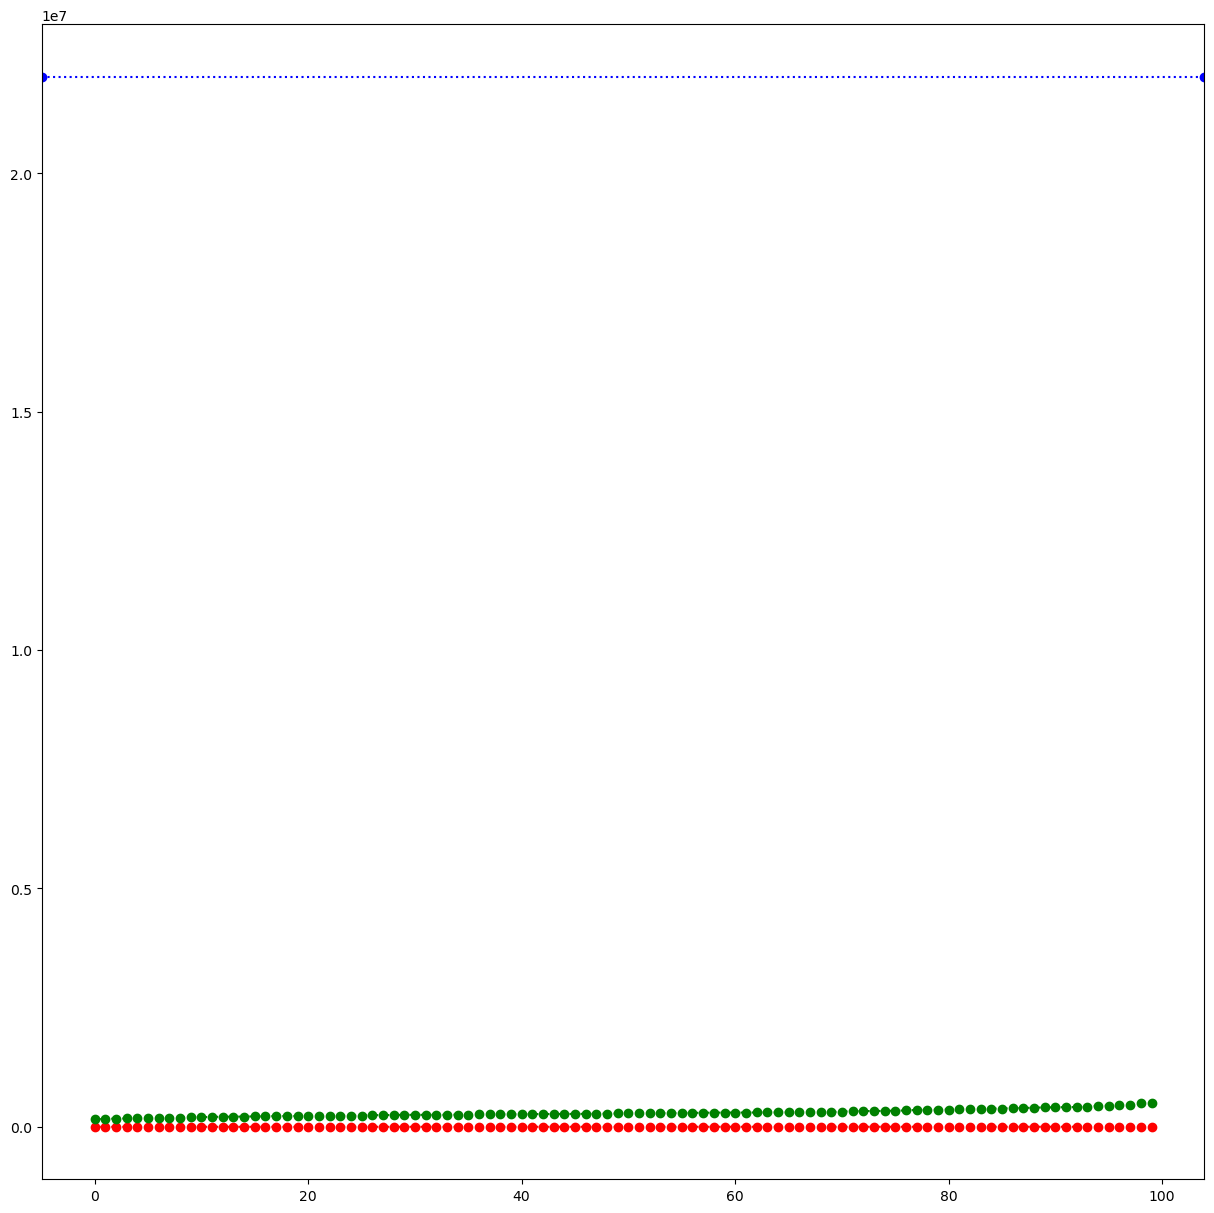

In [10]:
plt.figure(figsize=(15, 15))
plt.plot(y,"ro:",label="Dataset 2")
plt.plot(x,"go:",label="Dataset 1")
plt.axhline(cv,color='b',marker= 'o', linestyle=':',label="covariance")